In [89]:
import json
import numpy as np
import pandas as pd

In [90]:
path = "2023_05_09_09:01:45/result_0.json"

with open('../EvolutionaryFramework/results/NSGA_II/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [91]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for front in parsed_json[elem][generation]:
                    for individual in parsed_json[elem][generation][front]:
                        dictionary = {}
                        dictionary = {
                            'generation': generation,
                            'front': front,
                            'melody': individual['melody'],
                        }
                        for criterion in metaParameters_df['criteria'].values[0]:
                            dictionary[criterion] = individual['fitness'][criterion]
                        data.append(dictionary)
data_df = pd.DataFrame(data)

In [92]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_2601,front_2,58/0.0625 48/0.375 60/0.0625 67/0.1875 62/0.06...,405.625,-95.0000
1,generation_2601,front_2,58/0.0625 60/0.125 62/0.125 64/0.0625 63/0.062...,68.125,61.5625
2,generation_2601,front_2,0/0.0625 71/0.125 72/0.125 74/0.125 71/0.0625 ...,113.750,52.8125
3,generation_2601,front_2,58/0.0625 60/0.125 67/0.0625 67/0.125 67/0.125...,376.875,-63.4375
4,generation_2601,front_2,58/0.0625 60/0.3125 67/0.0625 70/0.0625 74/0.0...,291.875,-10.3125


In [93]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria
0,NSGA-II,100,4,16,f1,C,MAJOR,ONE_POINT_CROSSOVER,SIMPLE,0.8,,,10000,"[STABILITY, TENSION]"


In [94]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_2601,front_2,58/0.0625 48/0.375 60/0.0625 67/0.1875 62/0.06...,405.625,-95.0000
1,generation_2601,front_2,58/0.0625 60/0.125 62/0.125 64/0.0625 63/0.062...,68.125,61.5625
2,generation_2601,front_2,0/0.0625 71/0.125 72/0.125 74/0.125 71/0.0625 ...,113.750,52.8125
3,generation_2601,front_2,58/0.0625 60/0.125 67/0.0625 67/0.125 67/0.125...,376.875,-63.4375
4,generation_2601,front_2,58/0.0625 60/0.3125 67/0.0625 70/0.0625 74/0.0...,291.875,-10.3125


In [95]:
data_df.loc[0]

generation                                      generation_2601
front                                                   front_2
melody        58/0.0625 48/0.375 60/0.0625 67/0.1875 62/0.06...
STABILITY                                               405.625
TENSION                                                   -95.0
Name: 0, dtype: object

In [96]:
generation = data_df[data_df["generation"] == "1000"].sort_values(by=['front'])

In [97]:
list_of_fronts = []
for front in generation["front"].unique():
    front_elements = []
    front_data = generation[generation["front"] == front]


    for criterion in metaParameters_df['criteria'].values[0]:
        front_temp = []
        for individual in front_data[criterion]:
            front_temp.append(individual)
        front_elements.append(front_temp)
    list_of_fronts.append(front_elements)


In [98]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

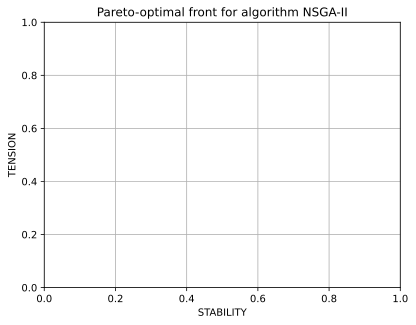

In [99]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()

for i, (x,y) in enumerate(list_of_fronts[0:1]):
    ax.scatter(x, y, label = f"front {i+1}")

# plt.legend()
plt.show()


In [100]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name].sort_values(by=['front'])
    print(generation_name)
    for front in generation["front"].unique():
        front_elements = []
        front_data = generation[generation["front"] == front]

        for criterion in metaParameters_df['criteria'].values[0]:
            front_temp = []
            for individual in front_data[criterion]:
                front_temp.append(individual)
            front_elements.append(front_temp)
        list_of_fronts.append(front_elements)
    list_of_generations.append(list_of_fronts)

average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem[0]):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp

print(average_generations)



generation_0
generation_1
generation_101
generation_201
generation_301
generation_401
generation_501
generation_601
generation_701
generation_801
generation_901
generation_1001
generation_1101
generation_1201
generation_1301
generation_1401
generation_1501
generation_1601
generation_1701
generation_1801
generation_1901
generation_2001
generation_2101
generation_2201
generation_2301
generation_2401
generation_2501
generation_2601
generation_2701
generation_2801
generation_2901
generation_3001
generation_3101
generation_3201
generation_3301
generation_3401
generation_3501
generation_3601
generation_3701
generation_3801
generation_3901
generation_4001
generation_4101
generation_4201
generation_4301
generation_4401
generation_4501
generation_4601
generation_4701
generation_4801
generation_4901
generation_5001
generation_5101
generation_5201
generation_5301
generation_5401
generation_5501
generation_5601
generation_5701
generation_5801
generation_5901
generation_6001
generation_6101
generat

[-47.1875     -67.5        -31.30208333  -1.97916667 -14.75
   8.64583333  16.77083333   3.46153846   9.26470588   4.4921875
  -7.3828125   -7.08806818  -1.66193182   3.95833333  -3.04435484
   6.32543103   5.3125       0.80882353  -4.09628378  -3.63715278
   3.95089286   0.26442308  -2.07589286  -5.07291667  -5.546875
  -7.60416667  -4.30397727  -1.70230263  -6.91722973  -9.10472973
  -8.56085526  -7.67755682  -9.66463415 -13.40625    -13.78125
 -16.68055556 -21.99468085 -21.86079545 -10.0297619   -8.78605769
  -9.26388889   0.82589286  -0.18292683   1.75304878   2.12053571
   2.29591837   1.20710784  -6.46484375  -4.95833333  -5.359375
  -4.58806818  -1.75130208  -5.3125      -8.28125     -6.82091346
 -11.29716981  -9.36403509  -9.25986842  -9.55681818  -7.93432203
  -8.43171296  -6.09933036  -4.64033019  -2.09635417  -4.96875
  -9.34840426  -9.03532609 -10.04755435  -9.0375     -14.20072115
 -14.00943396 -12.91666667 -15.58293269 -15.49107143 -14.67161017
 -16.80555556 -15.97115385 

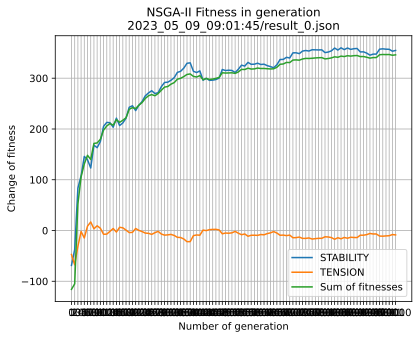

In [101]:
print(average_generations[:,i])

X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]


fig, ax = plt.subplots()
ax.set_title("NSGA-II Fitness in generation\n" + path)
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xlabel("Number of generation")
ax.set_ylabel("Change of fitness")

ax.grid()

plt.legend()
plt.show()